In [1]:
from google.colab import files
uploaded=files.upload()

Saving creditcard.csv to creditcard.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

df=pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [8]:
X = df.drop("Class", axis=1)
y = df["Class"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_sample, _, y_sample, _ = train_test_split(X_scaled, y, train_size=10000, stratify=y, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

In [18]:
linear_svc = LinearSVC(max_iter=10000, random_state=42)
linear_svc.fit(X_train, y_train)
y_pred_linear = linear_svc.predict(X_test)
acc_linear = accuracy_score(y_test, y_pred_linear)
print(f"LinearSVC Accuracy : {acc_linear:.4f}")

LinearSVC Accuracy : 1.0000


In [19]:
rbf_svc = SVC(kernel='rbf', random_state=42)
rbf_svc.fit(X_train, y_train)
y_pred_rbf = rbf_svc.predict(X_test)
acc_rbf = accuracy_score(y_test, y_pred_rbf)
print(f"SVC RBF Kernel Accuracy: {acc_rbf:.4f}")

SVC RBF Kernel Accuracy: 0.9990


In [20]:
poly_svc = SVC(kernel='poly', degree=3, random_state=42)
poly_svc.fit(X_train, y_train)
y_pred_poly = poly_svc.predict(X_test)
acc_poly = accuracy_score(y_test, y_pred_poly)
print(f"SVC Poly Kernel Accuracy: {acc_poly:.4f}")

SVC Poly Kernel Accuracy: 0.9995


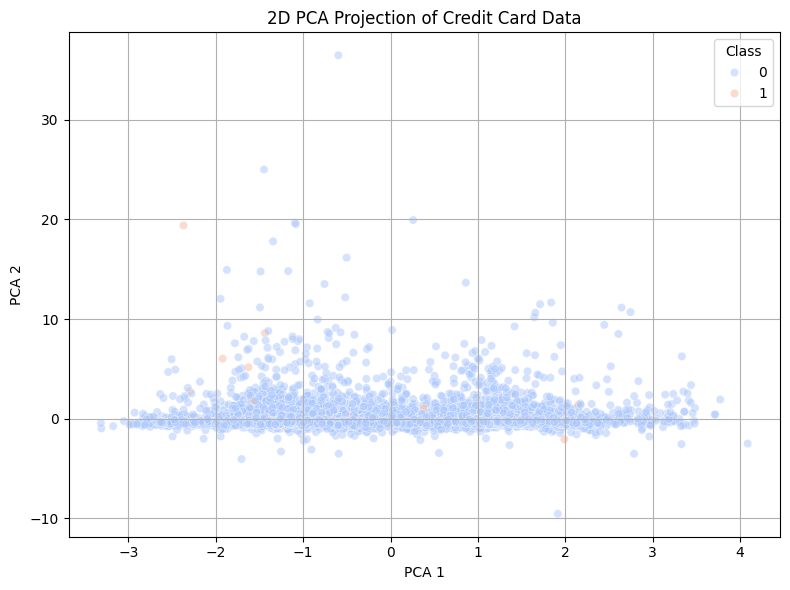

In [21]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_sample)

# Fit RBF SVM on PCA-reduced data
svm_vis = SVC(kernel='rbf')
svm_vis.fit(X_pca, y_sample)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_sample, palette="coolwarm", alpha=0.5)
plt.title('2D PCA Projection of Credit Card Data')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Class')
plt.grid(True)
plt.tight_layout()
plt.show()